In [210]:
 !pip install pyrenn

In [211]:
import matplotlib.pyplot as plt
import pyrenn
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

### Задание 1

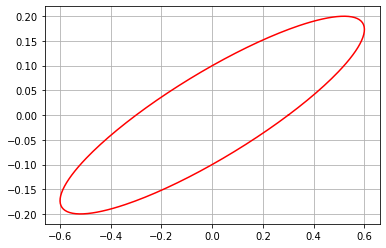

In [212]:
a = 0.6
b = 0.2
alpha = -np.pi / 3
x0 = 0
y0 = 0.
step = 0.025
t = np.linspace(0, 2 * np.pi, int(2 * np.pi / step), endpoint=True) 
x1 = a * np.cos(t + alpha) + x0
y1 = b * np.sin(t) + y0

plt.plot(x1, y1, c='r')
plt.grid(True)

In [213]:
nn1 = pyrenn.CreateNN([2, 1, 2])
nn1 = pyrenn.train_LM(np.array([x1,y1]), np.array([x1,y1]), nn1, E_stop=1e-5, k_max=100)



Maximum number of iterations reached


In [214]:
out1 = pyrenn.NNOut(np.array([x1,y1]), nn1)

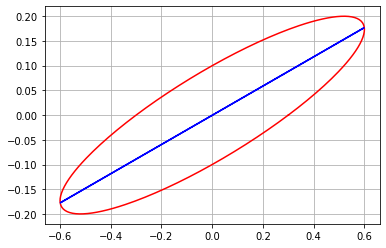

In [215]:
plt.plot(x1, y1, c='r')
plt.plot(out1[0], out1[1], c='b')
plt.grid(True)

### Задание 2
Использовать автоассоциативную сеть с узким горлом для аппроксимации кривой на плоскости, выделяя первую нелинейную главную компоненту данных.

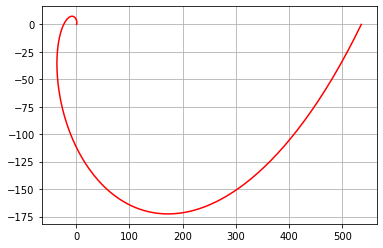

In [146]:
step = 0.025
phi = np.linspace(0, 2 * np.pi, int(2 * np.pi / step), endpoint=True)
def get_func(phi):
    r = np.exp(phi)
    return r * np.cos(phi), r * np.sin(phi)

x2, y2 = get_func(phi)

plt.plot(x2, y2, c='r')
plt.grid()
plt.show()

In [201]:
nn2 = pyrenn.CreateNN([2, 10, 1,  10, 2])

In [202]:
nn2 = pyrenn.train_LM(np.array([x2,y2]), np.array([x2, y2]), nn2, E_stop=1e-5, k_max=1000)


Maximum number of iterations reached


In [205]:
out2 = pyrenn.NNOut(np.array([x2,y2]), nn2)

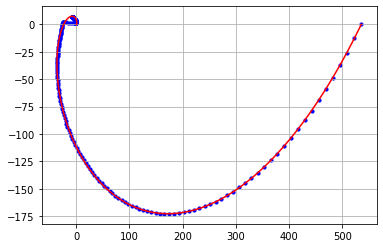

In [206]:
plt.plot(x2, y2, c='r')
plt.scatter(out2[0], out2[1],c='b', s=10)
plt.grid()

### Задание 3
Применить автоассоциативную сеть с узким горлом для аппроксимации пространственной кривой, выделяя старшие нелинейные главные компоненты данных

In [207]:
z = phi

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


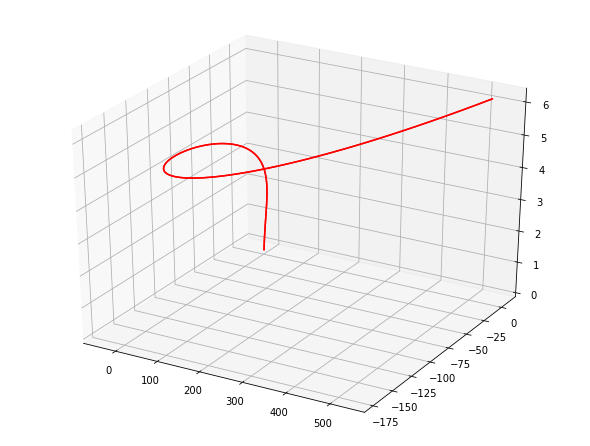

In [209]:
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)
ax.plot_wireframe(x2, y2, np.array([z, z]), color='r')

In [189]:
nn3 = pyrenn.CreateNN([3, 10, 1, 10, 3])

In [190]:
nn3 = pyrenn.train_LM(np.array([x2, y2, z]), np.array([x2, y2, z]), nn3, E_stop=1e-5, k_max=100)


Maximum number of iterations reached


In [191]:
out3 = pyrenn.NNOut(np.array([x2, y2, z]), nn3)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


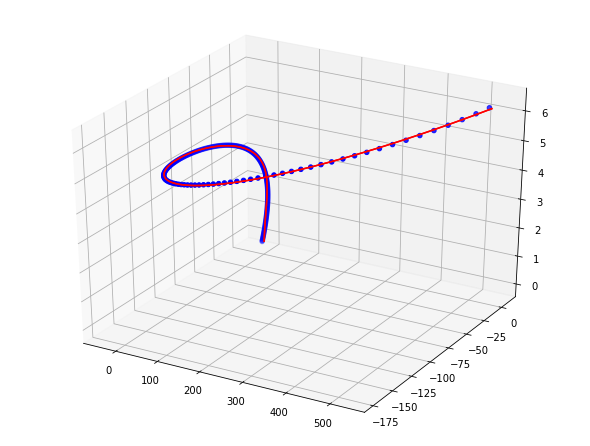

In [192]:
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)
ax.scatter(out3[0], out3[1], out3[2], color='b')
ax.plot_wireframe(x2, y2, np.array([z, z]), color='r')
plt.show()

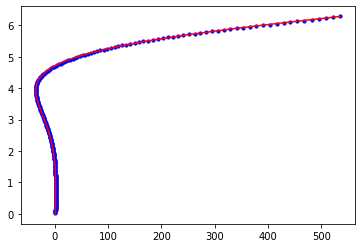

In [193]:
plt.plot(x2,z, c='r')
plt.scatter(x2,out3[2], c='b', s = 10);

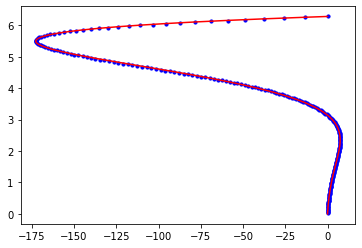

In [196]:
plt.plot(y2, z, c='r')
plt.scatter(y2, out3[2], c='b', s=10);